Saving roc_data.csv to roc_data.csv


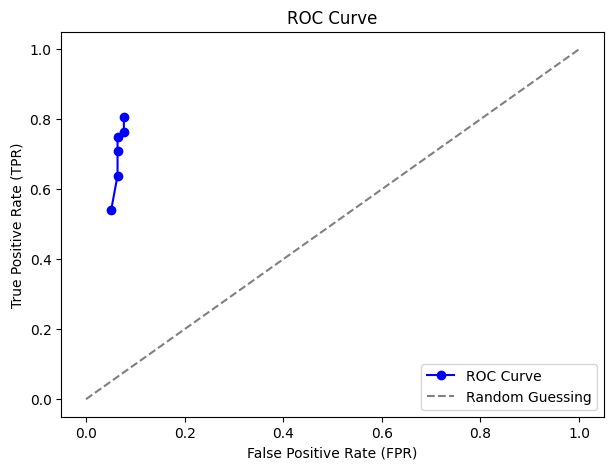

,Threshold,TP,FP,TN,FN,TPR,FPR
0,0.95,39,4,74,33,0.541667,0.051282
1,0.90,46,5,73,26,0.638889,0.064103
2,0.85,51,5,73,21,0.708333,0.064103
3,0.80,54,5,73,18,0.750000,0.064103
4,0.75,55,6,72,17,0.763889,0.076923
5,0.70,58,6,72,14,0.805556,0.076923


In [1]:
# Task 2a: Compute ROC Metrics and Plot ROC Curve for Uploaded Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from google.colab import files

# Upload files from local
uploaded = files.upload()

# Load the dataset
roc_data_df = pd.read_csv("roc_data.csv")  # Ensure correct file name
roc_data_df.columns = roc_data_df.columns.str.strip()

# Define thresholds
thresholds = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70]

# Prepare a list to store results
roc_data = []

# Compute TP, FP, TN, FN, TPR, and FPR for each threshold
for threshold in thresholds:
    roc_data_df['prediction_label'] = (roc_data_df['Prediction'] >= threshold).astype(int)

    TP = ((roc_data_df['prediction_label'] == 1) & (roc_data_df['True_Label'] == 1)).sum()
    FP = ((roc_data_df['prediction_label'] == 1) & (roc_data_df['True_Label'] == 0)).sum()
    TN = ((roc_data_df['prediction_label'] == 0) & (roc_data_df['True_Label'] == 0)).sum()
    FN = ((roc_data_df['prediction_label'] == 0) & (roc_data_df['True_Label'] == 1)).sum()

    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # Sensitivity / Recall
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # Fall-out

    roc_data.append([threshold, TP, FP, TN, FN, TPR, FPR])

# Convert to DataFrame
roc_df = pd.DataFrame(roc_data, columns=['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR'])

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(roc_df['FPR'], roc_df['TPR'], marker='o', linestyle='-', color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')  # Diagonal reference line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display results
from IPython.display import display
display(roc_df)
